In [1]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use("bmh")
%config InlineBackend.figure_formats=["png"]

In [2]:
bt = pd.read_csv('C:\\Users\\Павел\\Documents\\bitc\\sample.csv')

In [3]:
bt

,Unnamed: 0,timestamp,open,high,low,close,volume,exchange,type,ticker
0,0,2019-03-05 15:27:00,3834.75,3834.75,3831.75,3832.25,2000.0,drbt,perpetual-future,btc-usd
1,1,2019-03-05 15:28:00,3831.50,3831.50,3829.00,3829.50,2532.0,drbt,perpetual-future,btc-usd
2,2,2019-03-05 15:29:00,3829.50,3829.50,3829.25,3829.25,6997.0,drbt,perpetual-future,btc-usd
3,3,2019-03-05 15:30:00,3829.25,3829.75,3829.25,3829.75,1781.0,drbt,perpetual-future,btc-usd
4,4,2019-03-05 15:31:00,3830.00,3830.00,3829.75,3829.75,1100.0,drbt,perpetual-future,btc-usd
...,...,...,...,...,...,...,...,...,...,...
520842,1899,2020-04-09 11:57:00,7200.50,7202.50,7142.00,7161.00,2355550.0,drbt,perpetual-future,btc-usd
520843,1900,2020-04-09 11:58:00,7164.00,7184.50,7130.00,7180.00,875520.0,drbt,perpetual-future,btc-usd
520844,1901,2020-04-09 11:59:00,7183.50,7196.50,7173.00,7183.50,302520.0,drbt,perpetual-future,btc-usd
520845,1902,2020-04-09 12:00:00,7180.50,7182.50,7150.50,7158.50,1034480.0,drbt,perpetual-future,btc-usd


In [3]:
def d_l_day(data):
    print("First data: ",data['timestamp'].iloc[0], " Last data: ", data['timestamp'].iloc[-1], "\n")

In [4]:
d_l_day(bth19)
d_l_day(btu19)
d_l_day(btm19)
d_l_day(btz19)
d_l_day(bth20)
d_l_day(btm20)
d_l_day(btu20)


#1) bth19 btm19
#2) btm19 btu19
#3) btu19 btz19
#4) btz19 bth20
#5) bth20 btm20
#6) btm20 btu29

First data:  2019-03-05 15:26:00  Last data:  2019-03-29 07:59:00 

First data:  2019-03-27 08:49:00  Last data:  2019-09-27 07:59:00 

First data:  2019-03-05 15:27:00  Last data:  2019-06-28 07:59:00 

First data:  2019-06-24 11:54:00  Last data:  2019-12-27 07:59:00 

First data:  2019-09-20 11:30:00  Last data:  2020-03-16 12:00:00 

First data:  2019-12-20 11:15:00  Last data:  2020-03-19 12:01:00 

First data:  2020-03-02 10:42:00  Last data:  2020-03-19 12:01:00 



In [5]:
btm20

,timestamp,open,high,low,close,volume,exchange,type,ticker
0,2019-12-20 11:15:00,7312.5,7312.5,7312.5,7312.5,1300.0,drbt,future,btc26jun20
1,2019-12-20 11:16:00,7313.0,7313.0,7313.0,7313.0,1300.0,drbt,future,btc26jun20
2,2019-12-20 11:17:00,7312.0,7312.0,7312.0,7312.0,1300.0,drbt,future,btc26jun20
3,2019-12-20 11:45:00,7321.0,7321.0,7310.0,7310.0,50000.0,drbt,future,btc26jun20
4,2019-12-20 12:01:00,7323.0,7323.0,7323.0,7323.0,10.0,drbt,future,btc26jun20
...,...,...,...,...,...,...,...,...,...
7744,2020-03-19 11:57:00,5610.5,5621.0,5610.5,5621.0,2450.0,drbt,future,btc26jun20
7745,2020-03-19 11:58:00,5620.5,5620.5,5619.0,5620.5,520.0,drbt,future,btc26jun20
7746,2020-03-19 11:59:00,5633.0,5645.5,5625.0,5629.0,20900.0,drbt,future,btc26jun20
7747,2020-03-19 12:00:00,5636.5,5642.5,5636.5,5641.0,9300.0,drbt,future,btc26jun20


In [6]:
bt = bt[['timestamp', 'close']]

## bth19 btm19

In [7]:
i = 0
while(pd.Timestamp(bth19['timestamp'].iloc[i]) < pd.Timestamp(btm19.timestamp.iloc[0])):
    i += 1

In [8]:
# склеиваем bth19&btm19
bth19 = bth19.iloc[i:bth19.size]

In [9]:
bth19.timestamp.iloc[0] == btm19.timestamp.iloc[0]

True

In [10]:
j = 0   
i = 0
while(pd.Timestamp(bth19['timestamp'].iloc[j]) < pd.Timestamp(btu19.timestamp.iloc[0])):
    j += 1

while(pd.Timestamp(btm19['timestamp'].iloc[i]) < pd.Timestamp(btu19.timestamp.iloc[0])):
    i += 1

In [11]:
ar = pd.merge(bth19[['timestamp', 'close']][1:j], btm19[['timestamp', 'close']][1:i], on = ['timestamp'])

In [12]:
ar['spread'] = ar['close_y']/ar['close_x'] - 1

## Делаем данные

In [13]:
def frate(dbt_price, dbtu_price, global_day, cur_data, prev_time, tt):
    if (pd.Timestamp(cur_data) > pd.Timestamp(prev_time)): global_day += 1 
    dbtu_price = dbtu_price/dbt_price
    return (dbtu_price**(365/(tt-global_day)) - 1)*100

In [14]:
def foo(ar, delta, bt):
    ar['date'] = [pd.Timestamp(d).date() for d in ar['timestamp']]
    
    i = 0
    while(pd.Timestamp(bt['timestamp'].iloc[i]) < pd.Timestamp(ar.timestamp.iloc[0])):
        i += 1
    ###
    bt = bt.iloc[i:bt.size]
    
    ar = pd.merge(ar, bt, on = ['timestamp'])
    ar = ar.rename({"close": "bts"}, axis='columns')
    ###
    time_to_exp = ar['date'].unique().size + delta

    j = 0
    x = np.array([frate(ar['close_x'][i], ar['close_y'][i], j, ar['date'].iloc[i], ar['date'].iloc[i-1], time_to_exp)
                  for i in range(1, int(ar['close_x'].size))])

    y = np.array([frate(ar['bts'][i], ar['close_x'][i], j, ar['date'].iloc[i], ar['date'].iloc[i-1], time_to_exp)
                  for i in range(1, int(ar['close_y'].size))])
    
    ar = ar.drop([0])
    ar['an_frate'] = x
    ar['an_brate'] = y
    ###
    time_to_exp = ar['date'].unique().size + delta

    exp = []
    for i in range(1, ar['date'].size):
        if(pd.Timestamp(ar['date'].iloc[i-1]) < pd.Timestamp(ar['date'].iloc[i])): time_to_exp -= 1
        exp.append(time_to_exp)

    ar = ar.drop([1])
    ar['time_to_exp'] = exp
    
    ar = ar.drop(columns=['date', 'close_x', 'close_y'])
    
    return ar

In [15]:
ar = foo(ar, 4, bt)

In [16]:
ar

,timestamp,spread,bts,an_frate,an_brate,time_to_exp
2,2019-03-05 15:31:00,-0.003004,3829.75,-3.985713,-0.615963,27
3,2019-03-05 15:32:00,-0.002808,3830.00,-3.729371,-0.352388,27
4,2019-03-05 15:33:00,-0.003722,3830.25,-4.915512,-0.440276,27
5,2019-03-05 15:35:00,-0.003331,3829.00,-4.410243,-0.440419,27
6,2019-03-05 15:38:00,-0.002810,3826.75,-3.732963,-0.528597,27
...,...,...,...,...,...,...
6698,2019-03-27 07:42:00,-0.006601,3981.25,-8.564411,-1.600895,5
6699,2019-03-27 07:58:00,-0.006348,3981.25,-8.249012,-1.265850,5
6700,2019-03-27 08:05:00,-0.006157,3982.00,-8.010454,-1.013683,5
6701,2019-03-27 08:45:00,-0.005665,3974.75,-7.392969,-1.099718,5


## btm19 btu19

In [17]:
i = 0
while(pd.Timestamp(btm19['timestamp'].iloc[i]) < pd.Timestamp(btu19.timestamp.iloc[0])):
    i += 1

In [18]:
btm19 = btm19.iloc[i:btm19.size]

In [19]:
ar2 = pd.merge(btm19[['timestamp', 'close']][1:btm19.size], btu19[['timestamp', 'close']][1:btm19.size], on = ['timestamp'])

In [20]:
ar2['spread'] = ar2['close_y']/ar2['close_x'] - 1

In [21]:
ar2

,timestamp,close_x,close_y,spread
0,2019-03-27 08:59:00,3954.75,3928.00,-0.006764
1,2019-03-27 09:22:00,3950.00,3927.25,-0.005759
2,2019-03-27 09:26:00,3953.00,3929.75,-0.005882
3,2019-03-27 09:27:00,3955.25,3932.00,-0.005878
4,2019-03-27 10:04:00,3954.00,3933.00,-0.005311
...,...,...,...,...
59535,2019-06-28 07:55:00,11298.00,11685.00,0.034254
59536,2019-06-28 07:56:00,11300.50,11702.50,0.035574
59537,2019-06-28 07:57:00,11302.00,11722.00,0.037162
59538,2019-06-28 07:58:00,11308.50,11718.00,0.036212


In [22]:
ar2 = ar2[:-10000]

In [23]:
ar2 = foo(ar2, 7, bt)

C:\Users\molot\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## btu19 btz19

In [24]:
i = 0
while(pd.Timestamp(btu19['timestamp'].iloc[i]) < pd.Timestamp(btz19.timestamp.iloc[0])):
    i += 1

In [25]:
btu19 = btu19.iloc[i:btu19.size]

In [26]:
j = 0   
i = 0
while(pd.Timestamp(btu19['timestamp'].iloc[j]) < pd.Timestamp(bth20.timestamp.iloc[0])):
    j += 1

while(pd.Timestamp(btz19['timestamp'].iloc[i]) < pd.Timestamp(bth20.timestamp.iloc[0])):
    i += 1

In [27]:
ar3 = pd.merge(btu19[['timestamp', 'close']][1:j], btz19[['timestamp', 'close']][1:i], on = ['timestamp'])

In [28]:
ar3['spread'] = ar3['close_y']/ar3['close_x'] - 1

In [29]:
ar3 = foo(ar3, 14, bt)

## btz19 bth20

In [30]:
i = 0
while(pd.Timestamp(btz19['timestamp'].iloc[i]) < pd.Timestamp(bth20.timestamp.iloc[0])):
    i += 1

In [31]:
btz19 = btz19.iloc[i:btz19.size]

In [32]:
j = 0   
i = 0
while(pd.Timestamp(btz19['timestamp'].iloc[j]) < pd.Timestamp(btm20.timestamp.iloc[0])):
    j += 1

while(pd.Timestamp(bth20['timestamp'].iloc[i]) < pd.Timestamp(btm20.timestamp.iloc[0])):
    i += 1

In [33]:
ar4 = pd.merge(btz19[['timestamp', 'close']][1:j], bth20[['timestamp', 'close']][1:i], on = ['timestamp'])

In [34]:
ar4['spread'] = ar4['close_y']/ar4['close_x'] - 1

In [35]:
ar4 = foo(ar4, 14, bt)

## bth20 btm20

In [36]:
i = 0
while(pd.Timestamp(bth20['timestamp'].iloc[i]) < pd.Timestamp(btm20.timestamp.iloc[0])):
    i += 1

In [37]:
bth20 = bth20.iloc[i:bth20.size]

In [38]:
j = 0   
i = 0
while(pd.Timestamp(bth20['timestamp'].iloc[j]) < pd.Timestamp(btu20.timestamp.iloc[0])):
    j += 1

while(pd.Timestamp(btm20['timestamp'].iloc[i]) < pd.Timestamp(btu20.timestamp.iloc[0])):
    i += 1

In [39]:
ar5 = pd.merge(bth20[['timestamp', 'close']][1:j], btm20[['timestamp', 'close']][1:i], on = ['timestamp'])

In [40]:
ar5['spread'] = ar5['close_y']/ar5['close_x'] - 1

In [41]:
ar5 = foo(ar5, 22, bt)

# btm20 btu20

In [42]:
i = 0
while(pd.Timestamp(btm20['timestamp'].iloc[i]) < pd.Timestamp(btu20.timestamp.iloc[0])):
    i += 1

In [43]:
btm20 = btm20.iloc[i:btm20.size]

In [44]:
j = 0   
while(pd.Timestamp(btm20['timestamp'].iloc[j]) < pd.Timestamp(btu20.timestamp.iloc[-1])):
    j += 1

In [45]:
ar6 = pd.merge(btm20[['timestamp', 'close']][1:j], btu20[['timestamp', 'close']][1:j], on = ['timestamp'])

In [46]:
ar6['spread'] = ar6['close_y']/ar6['close_x'] - 1

In [47]:
ar6 = foo(ar6, 110, bt)

In [48]:
ar6

,timestamp,spread,bts,an_frate,an_brate,time_to_exp
2,2020-03-02 10:49:00,0.024570,8712.5,7.284539,13.308367,126
3,2020-03-02 10:53:00,0.026241,8723.0,7.792124,13.327729,126
4,2020-03-02 11:06:00,0.026824,8748.0,7.969810,13.306044,126
5,2020-03-02 11:15:00,0.024587,8729.5,7.289734,13.173396,126
6,2020-03-02 11:21:00,0.026800,8721.0,7.962380,13.276840,126
...,...,...,...,...,...,...
11072,2020-03-17 19:16:00,0.008246,5364.5,2.407413,-1.531255,111
11073,2020-03-17 19:17:00,0.009475,5356.0,2.769380,-1.399761,111
11074,2020-03-17 19:18:00,0.009938,5363.5,2.906116,-1.638435,111
11075,2020-03-17 19:23:00,0.008533,5360.5,2.492029,-1.532392,111


## Сплющиваем

In [75]:
q = ar2['spread'] - (ar2['spread'].iloc[0] - ar['spread'].iloc[-1])
ar2['spread'] = q

q = ar3['spread'] - (ar3['spread'].iloc[0] - ar2['spread'].iloc[-1])
ar3['spread'] = q

q = ar4['spread'] - (ar4['spread'].iloc[0] - ar3['spread'].iloc[-1])
ar4['spread'] = q

q = ar5['spread'] - (ar5['spread'].iloc[0] - ar4['spread'].iloc[-1])
ar5['spread'] = q

q = ar6['spread'] - (ar6['spread'].iloc[0] - ar5['spread'].iloc[-1])
ar6['spread'] = q

In [76]:
sp = ar.append(ar2)

In [77]:
sp = sp.append(ar3)

In [78]:
sp = sp.append(ar4)

In [79]:
sp = sp.append(ar5)

In [80]:
sp = sp.append(ar6)

In [81]:
sp = sp.set_index('timestamp')

In [56]:
n_sp = []
for i in range(1, sp['spread'].size):
    if(sp['spread'].iloc[i] > 0.08): n_sp.append(sp.iloc[i].name)

In [84]:
ar6

,timestamp,spread,bts,an_frate,an_brate,time_to_exp
2,2020-03-02 10:49:00,0.043013,8712.5,7.284539,13.308367,126
3,2020-03-02 10:53:00,0.044684,8723.0,7.792124,13.327729,126
4,2020-03-02 11:06:00,0.045267,8748.0,7.969810,13.306044,126
5,2020-03-02 11:15:00,0.043030,8729.5,7.289734,13.173396,126
6,2020-03-02 11:21:00,0.045243,8721.0,7.962380,13.276840,126
...,...,...,...,...,...,...
11072,2020-03-17 19:16:00,0.026689,5364.5,2.407413,-1.531255,111
11073,2020-03-17 19:17:00,0.027918,5356.0,2.769380,-1.399761,111
11074,2020-03-17 19:18:00,0.028381,5363.5,2.906116,-1.638435,111
11075,2020-03-17 19:23:00,0.026976,5360.5,2.492029,-1.532392,111


In [57]:
for ind in n_sp:
    sp = sp.drop(index = ind)

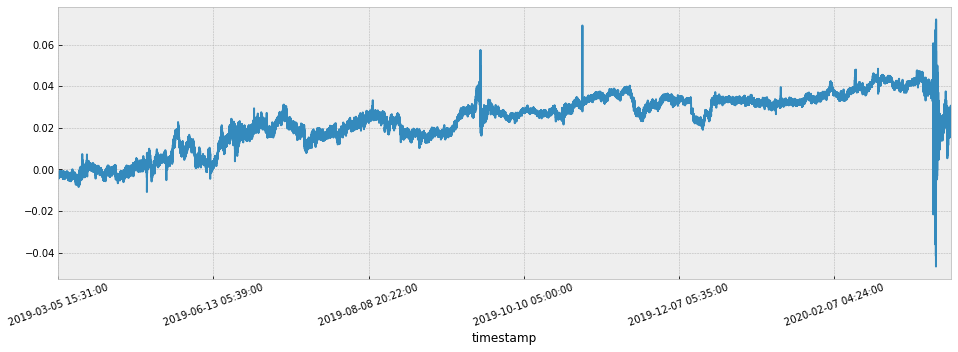

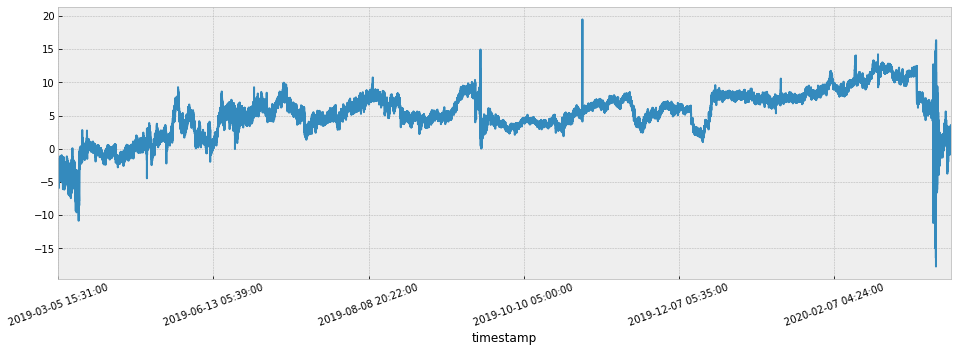

In [58]:
sp['spread'].plot(figsize = (16, 5))
plt.xticks(rotation = 20)
plt.show()
sp['an_frate'].plot(figsize = (16, 5))
plt.xticks(rotation = 20)
plt.show()

In [59]:
sp.to_csv(r'C:\Users\molot\OneDrive\Desktop\sp_d_s.csv')

## Замечаем что годовая ставка ближнеквартального фьючерска хорошо приближает изменения движения нашего синтетического актива. То есть на уровнях 10-15 шортим, на 0-3 встаем в лонг

In [60]:
hour = []
for i in range(sp['spread'].size):
    hour.append(datetime.fromisoformat(sp.iloc[i].name).hour)

In [61]:
sp['hour'] = hour

In [62]:
sp['date'] = [pd.Timestamp(d).date() for d in sp.index]

In [63]:
sp = sp.groupby(['date', 'hour'])['spread', 'bts', 'an_frate', 'an_brate', 'time_to_exp'].mean()

In [64]:
sp

spread          bts  an_frate  an_brate  time_to_exp
date       hour                                                        
2019-03-05 15   -0.002979  3826.589286 -3.951480 -0.628404         27.0
           16   -0.003039  3849.510638 -4.028253 -1.282234         27.0
           17   -0.002882  3833.534091 -3.825478 -0.550230         27.0
           18   -0.002934  3837.073529 -3.893304 -0.978581         27.0
           19   -0.002845  3843.950000 -3.775014 -0.641528         27.0
...                   ...          ...       ...       ...          ...
2020-03-17 15    0.023015  5310.532609  1.331033 -0.471217        111.0
           16    0.024610  5394.530612  1.798168 -0.805903        111.0
           17    0.025629  5370.756098  2.096511 -1.119063        111.0
           18    0.025791  5396.312500  2.144195 -1.275090        111.0
           19    0.027389  5351.194444  2.614246 -1.379968        111.0

[8647 rows x 5 columns]

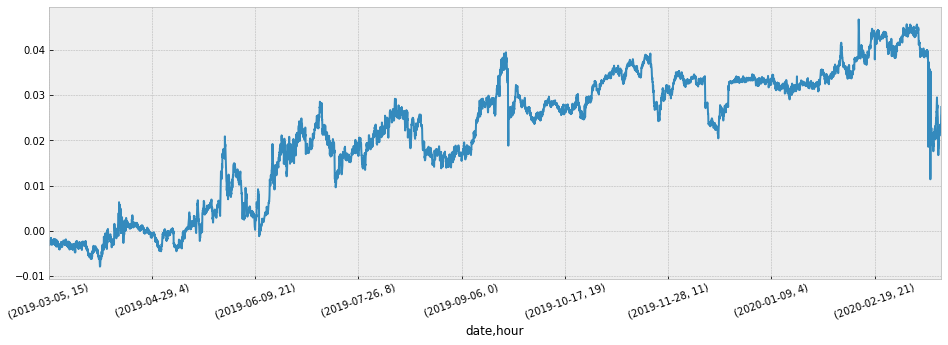

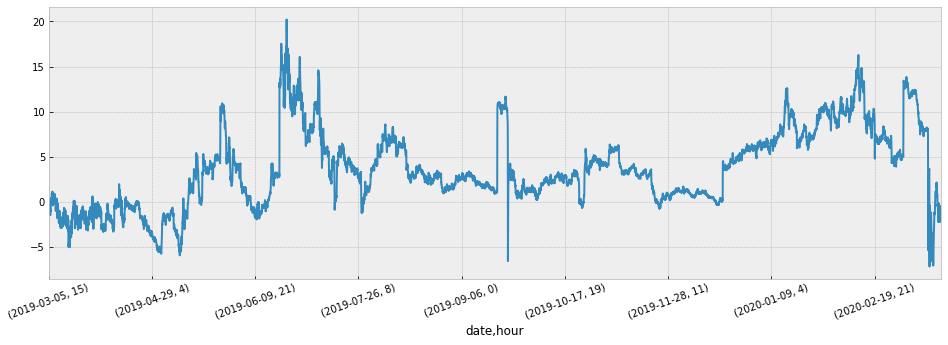

In [73]:
sp['spread'].plot(figsize = (16, 5))
plt.xticks(rotation = 20)
plt.show()
sp['an_brate'].plot(figsize = (16, 5))
plt.xticks(rotation = 20)
plt.show()

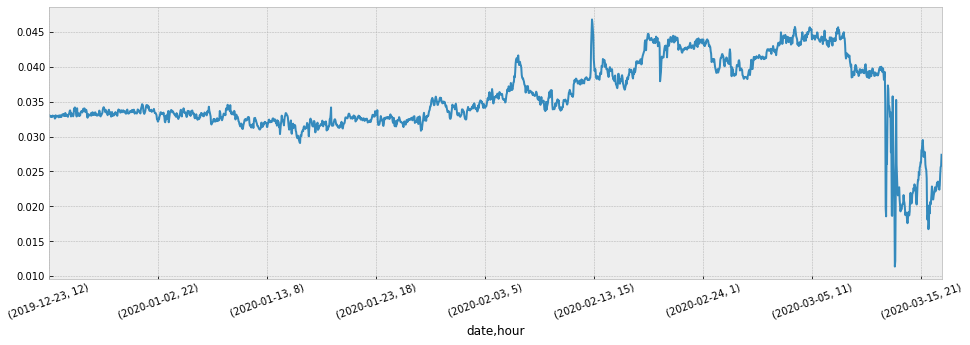

In [66]:
sp[6600:sp.shape[0]]['spread'].plot(figsize = (16, 5))
plt.xticks(rotation = 20)
plt.show()

In [67]:
sp_t = sp[6600:sp.shape[0]]

In [68]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    rolling_std =  series.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")
    plt.plot(q[n:], label="Actual values")
    plt.plot(figsize=(22, 12))
    plt.legend(loc="upper left")
    plt.grid(True)

In [69]:
q = []
for i in range(sp_t['spread'].shape[0]):
    q.append(sp_t['spread'][i])

In [70]:
q = pd.DataFrame(q, columns = ['spread'])

In [71]:
q

,spread
0,0.032974
1,0.033069
2,0.032943
3,0.032974
4,0.032830
...,...
2042,0.023015
2043,0.024610
2044,0.025629
2045,0.025791


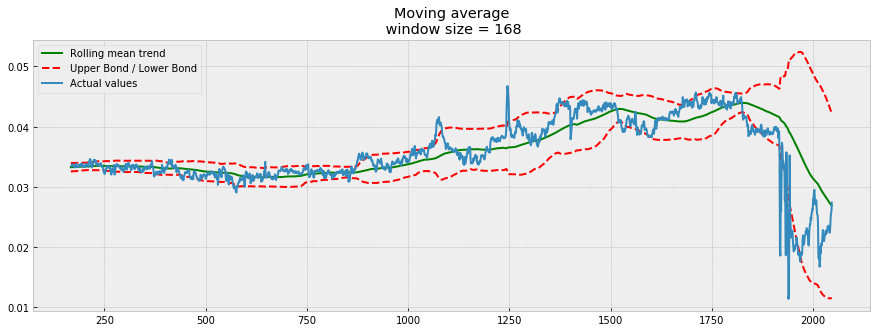

In [72]:
plotMovingAverage(q, 24*7)

In [74]:
sp

spread          bts  an_frate  an_brate  time_to_exp
date       hour                                                        
2019-03-05 15   -0.002979  3826.589286 -3.951480 -0.628404         27.0
           16   -0.003039  3849.510638 -4.028253 -1.282234         27.0
           17   -0.002882  3833.534091 -3.825478 -0.550230         27.0
           18   -0.002934  3837.073529 -3.893304 -0.978581         27.0
           19   -0.002845  3843.950000 -3.775014 -0.641528         27.0
...                   ...          ...       ...       ...          ...
2020-03-17 15    0.023015  5310.532609  1.331033 -0.471217        111.0
           16    0.024610  5394.530612  1.798168 -0.805903        111.0
           17    0.025629  5370.756098  2.096511 -1.119063        111.0
           18    0.025791  5396.312500  2.144195 -1.275090        111.0
           19    0.027389  5351.194444  2.614246 -1.379968        111.0

[8647 rows x 5 columns]

In [ ]:
sp.to_csv(r'C:\Users\molot\OneDrive\Desktop\spread_btmx.csv')

# dump

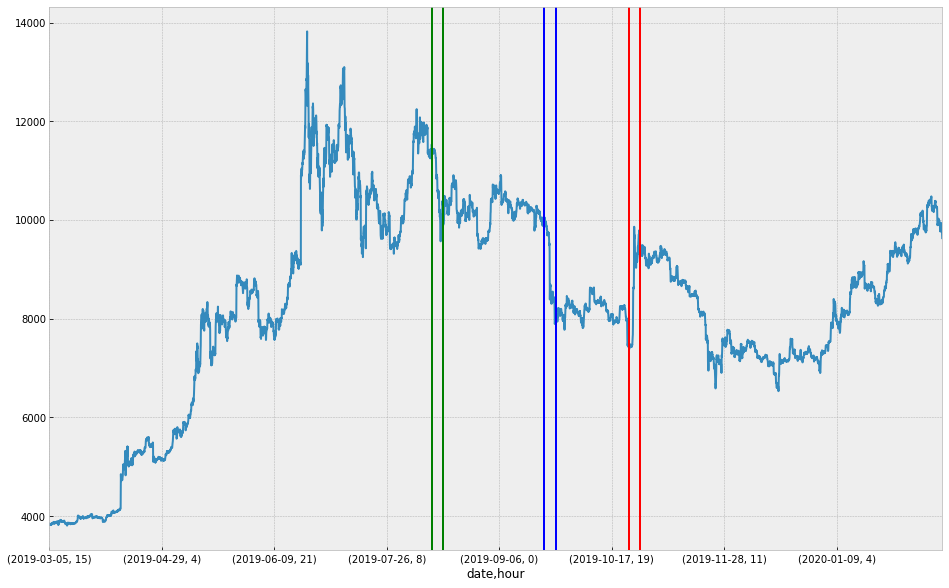

In [137]:
sp['bts'].plot(figsize = (16, 10))
plt.axvline(x=4500, linewidth=2, color="b")
plt.axvline(x=4400, linewidth=2, color="b")

plt.axvline(x=5250, linewidth=2, color="r")
plt.axvline(x=5150, linewidth=2, color="r")

plt.axvline(x=3500, linewidth=2, color="g")
plt.axvline(x=3400, linewidth=2, color="g")

In [138]:
s1 = sp['bts'][4400:4500]
o1 = sp['spread'][4400:4500]

s2 = sp['bts'][5150:5250]
o2 = sp['spread'][5150:5250]

s3 = sp['bts'][3400:3500]
o3 = sp['spread'][3400:3500]


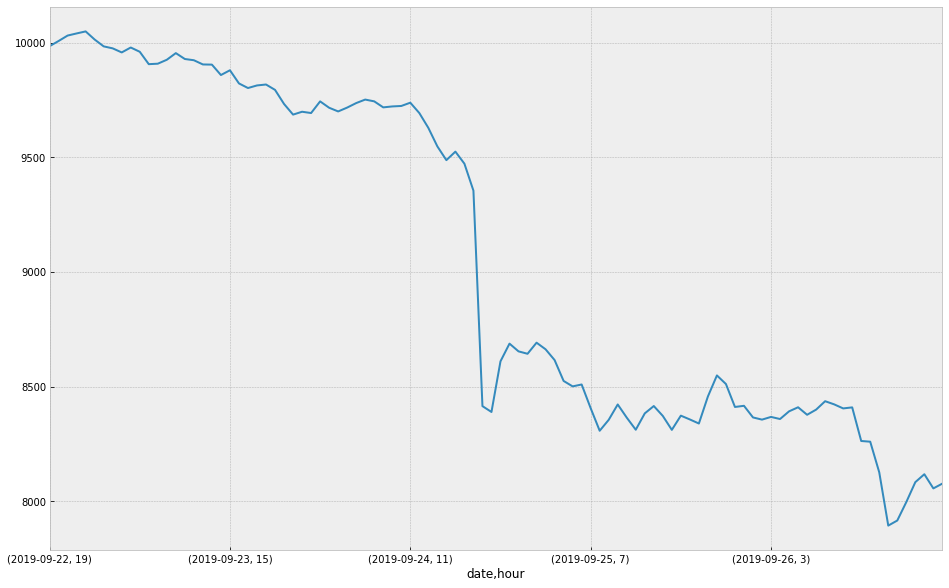

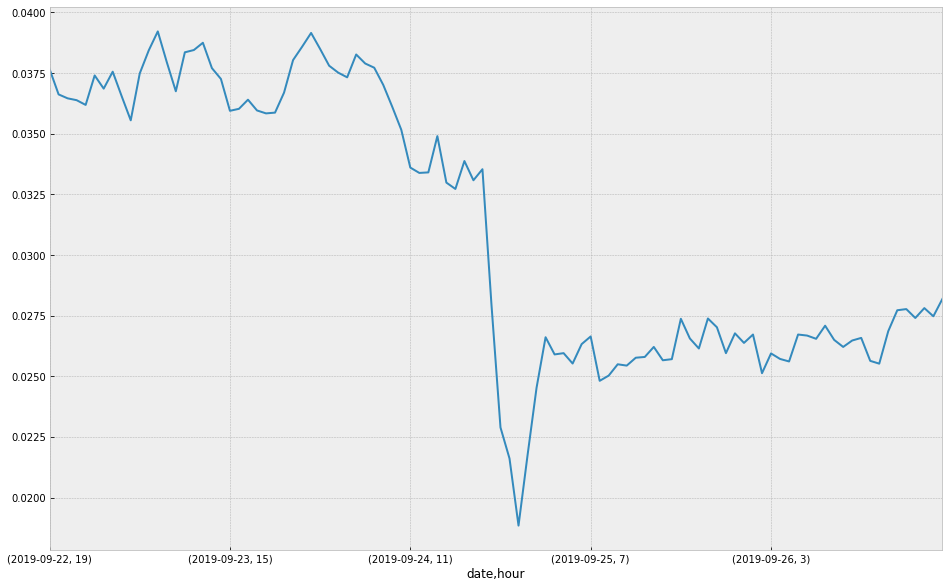

In [122]:
s1.plot(figsize=(16, 10))
plt.show()
o1.plot(figsize=(16, 10))

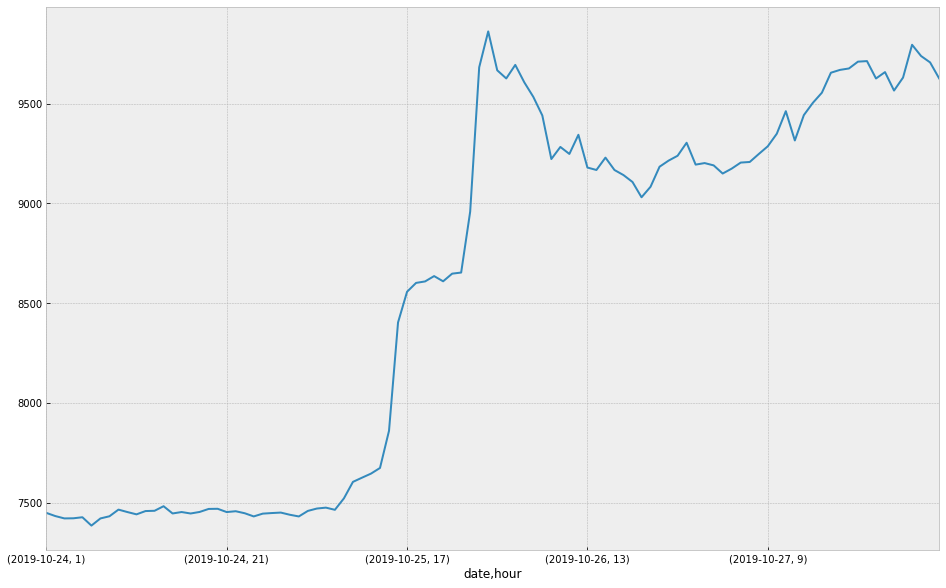

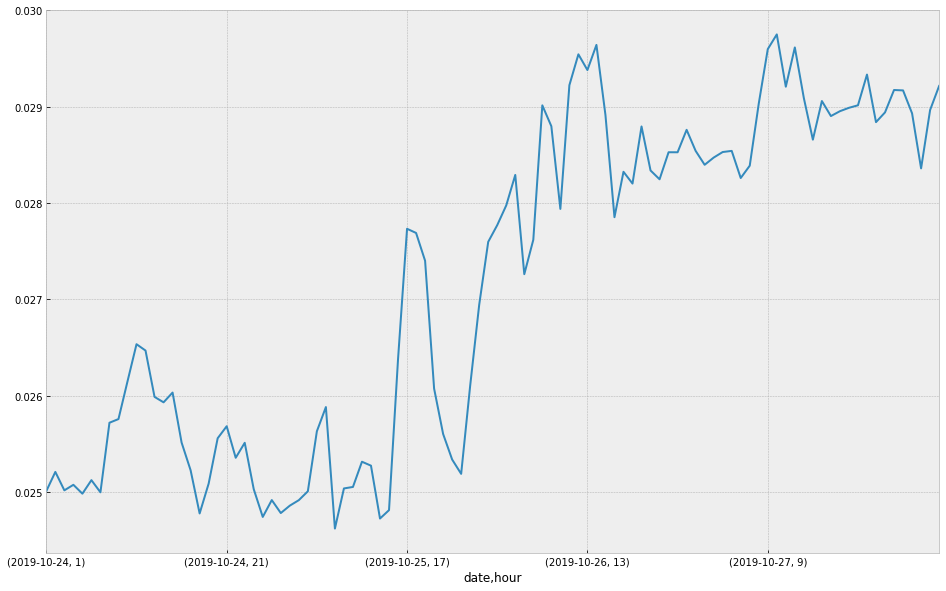

In [139]:
s2.plot(figsize=(16, 10))
plt.show()
o2.plot(figsize=(16, 10))
plt.show()

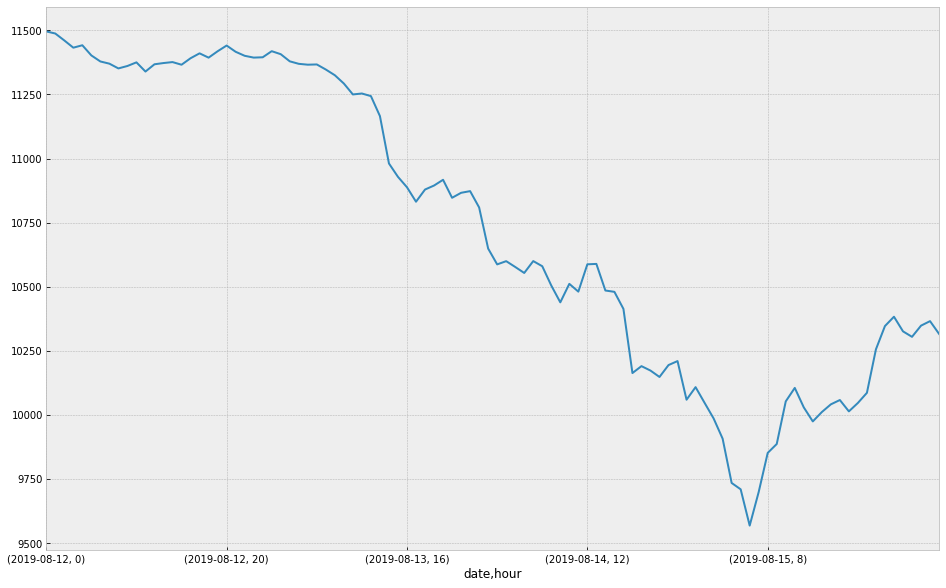

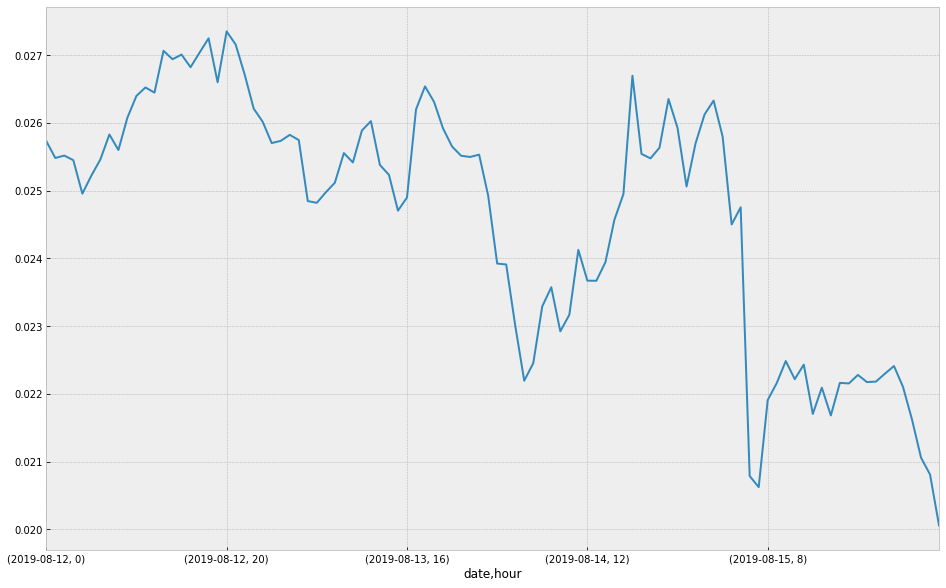

In [140]:
s3.plot(figsize=(16, 10))
plt.show()
o3.plot(figsize=(16, 10))
plt.show()

In [ ]:
SMA = []
for i in range(23,sp_t.shape[0]):
    sumt = 0
    for j in range(23):
            sumt += sp_t.iloc[i-j,0]       
    SMA.append(sumt/23)

In [ ]:
sp_t = sp_t[23:sp_t.shape[0]]

In [ ]:
sp_t['SMA1'] = SMA

In [ ]:
sp_t['spread'].plot(figsize = (16, 5))
sp_t['SMA1'].plot(figsize = (16, 5))
plt.xticks(rotation = 20)
plt.show()

In [ ]:
SMA = []
for i in range(167,sp_t.shape[0]):
    sumt = 0
    for j in range(167):
            sumt += sp_t.iloc[i-j,0]       
    SMA.append(sumt/167)

In [ ]:
sp_t = sp_t[167:sp_t.shape[0]]

In [ ]:
sp_t['SMA7'] = SMA

In [ ]:
sp_t['spread'].plot(figsize = (16, 5))
sp_t['SMA1'].plot(figsize = (16, 5))
sp_t['SMA7'].plot(figsize = (16, 5))
plt.xticks(rotation = 20)
plt.show()

## В приближении спреда последних 2х контрактов построим 2 SMA на 1 и на 7 дней
## Их пересечения так же говорит о развороте цены

In [55]:
bth19= pd.read_csv(r'C:\Users\molot\OneDrive\Desktop\bit_pair_der\drbt_future_btc29mar19.csv', index_col=0)
bth20 = pd.read_csv(r'C:\Users\molot\OneDrive\Desktop\bit_pair_der\drbt_future_btc27mar20.csv', index_col=0)
btm19 = pd.read_csv(r'C:\Users\molot\OneDrive\Desktop\bit_pair_der\drbt_future_btc28jun19.csv', index_col=0)
btm20 = pd.read_csv(r'C:\Users\molot\OneDrive\Desktop\bit_pair_der\drbt_future_btc26jun20.csv', index_col=0)
btu19 = pd.read_csv(r'C:\Users\molot\OneDrive\Desktop\bit_pair_der\drbt_future_btc27sep19.csv', index_col=0)
btz19 = pd.read_csv(r'C:\Users\molot\OneDrive\Desktop\bit_pair_der\drbt_future_btc27dec19.csv', index_col=0)
bt = pd.read_csv(r'C:\Users\molot\OneDrive\Desktop\bit_pair_der\drbt_future_btcperpetual.csv', index_col=0)
d_l_day(bth19)
d_l_day(btu19)
d_l_day(btm19)
d_l_day(btz19)
d_l_day(bth20)
d_l_day(btm20)

First data:  2019-03-05 15:26:00  Last data:  2019-03-29 07:59:00 

First data:  2019-03-27 08:49:00  Last data:  2019-09-27 07:59:00 

First data:  2019-03-05 15:27:00  Last data:  2019-06-28 07:59:00 

First data:  2019-06-24 11:54:00  Last data:  2019-12-27 07:59:00 

First data:  2019-09-20 11:30:00  Last data:  2020-02-17 12:01:00 

First data:  2019-12-20 11:15:00  Last data:  2020-02-17 12:01:00 



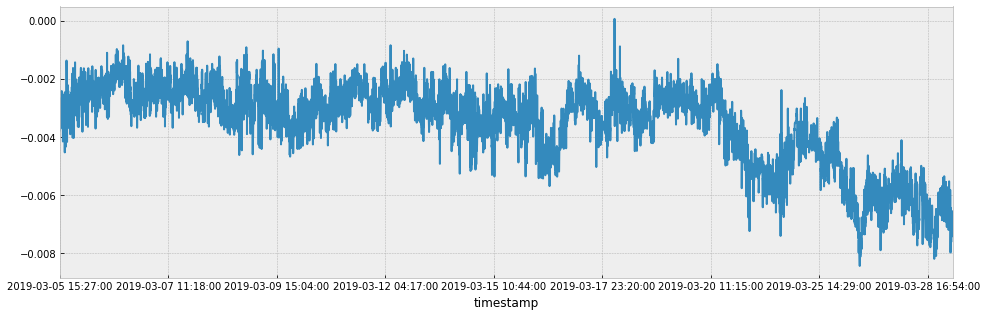

In [227]:
i = 0
while(pd.Timestamp(bth19['timestamp'].iloc[i]) < pd.Timestamp(btm19.timestamp.iloc[0])):
    i += 1
    
bth19 = bth19.iloc[i:bth19.size]
i = 0

ar = pd.merge(bth19[['timestamp', 'close']], btm19[['timestamp', 'close']], on = ['timestamp'])
ar['spread'] = ar['close_y']/ar['close_x'] - 1
ar.set_index('timestamp')['spread'].plot(figsize = (16, 5))
plt.show()

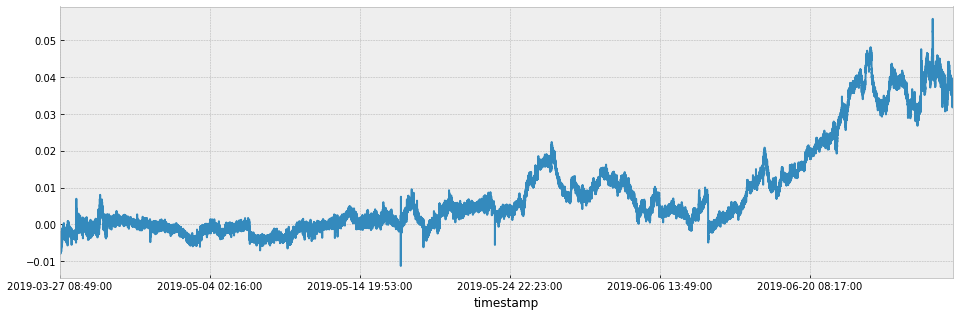

In [228]:
i = 0
while(pd.Timestamp(btm19['timestamp'].iloc[i]) < pd.Timestamp(btu19.timestamp.iloc[0])):
    i += 1
    
btm19 = btm19.iloc[i:btm19.size]

ar = pd.merge(btm19[['timestamp', 'close']], btu19[['timestamp', 'close']], on = ['timestamp'])
ar['spread'] = ar['close_y']/ar['close_x'] - 1
ar.set_index('timestamp')['spread'].plot(figsize = (16, 5))
plt.show()

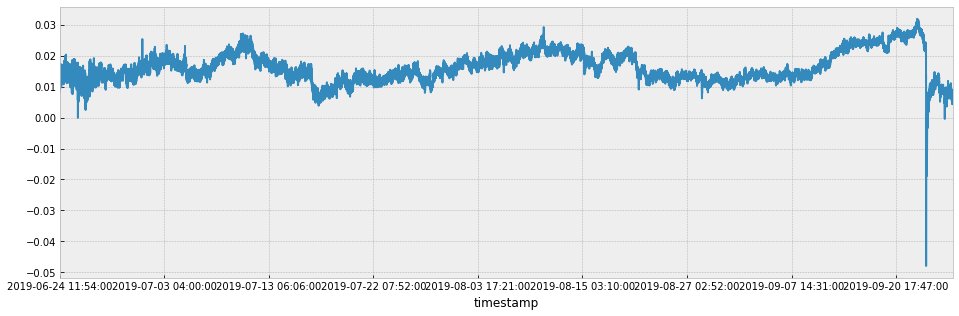

In [229]:
i = 0
while(pd.Timestamp(btu19['timestamp'].iloc[i]) < pd.Timestamp(btz19.timestamp.iloc[0])):
    i += 1
    
btu19 = btu19.iloc[i:btu19.size]

ar = pd.merge(btu19[['timestamp', 'close']], btz19[['timestamp', 'close']], on = ['timestamp'])
ar['spread'] = ar['close_y']/ar['close_x'] - 1

ar.set_index('timestamp')['spread'].plot(figsize = (16, 5))
plt.show()

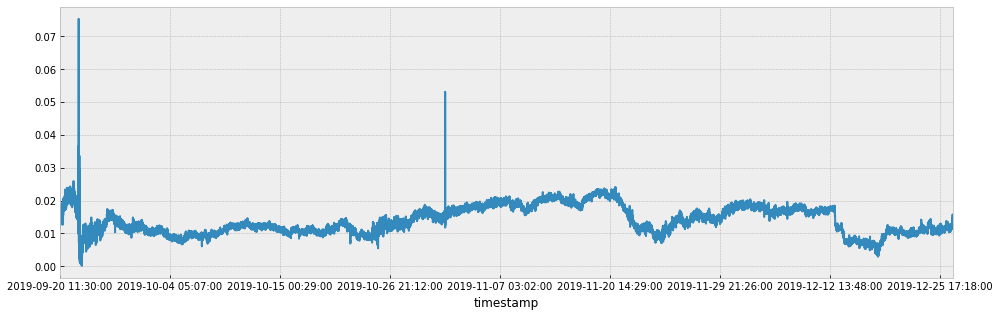

In [56]:
i = 0
while(pd.Timestamp(btz19['timestamp'].iloc[i]) < pd.Timestamp(bth20.timestamp.iloc[0])):
    i += 1
    
btz19 = btz19.iloc[i:btz19.size]

ar = pd.merge(btz19[['timestamp', 'close']], bth20[['timestamp', 'close']], on = ['timestamp'])
ar['spread'] = ar['close_y']/ar['close_x'] - 1

ar.set_index('timestamp')['spread'].plot(figsize = (16, 5))
plt.show()